# 111

In [1]:
# Sanity check of your system and your brain :)
"A" == "A"

True

In [2]:
# for reproducibility
import numpy as np
import random
random_seed=42
np.random.seed(random_seed)
random.seed(random_seed)


## Preparing data and black (In Orange framework, it is simple and good)

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np

from prepare_dataset import prepare_adult_dataset,prepare_german_dataset,prepare_compas_dataset,prepare_pima_dataset,train_test_split_data,prepare_2d_sinusoidal_dataset
from utils import encoder_from_datatable


data_table,test_data_table = prepare_adult_dataset()
# data_table,test_data_table = prepare_2d_sinusoidal_dataset()

# data_table,test_data_table = prepare_german_dataset()

# data_table,test_data_table = prepare_compas_dataset()

# data_table, vali_data_table = train_test_split_data(data_table)
# data_table,test_data_table = prepare_pima_dataset()

print("shape of train set", data_table.X.shape)
# print("instances of evaluation set", vali_data_table.X.shape[0])
print("shape of test set", test_data_table.X.shape)


/Users/lucy/Desktop/workspace/Descriptive-Induction-ML/prepare_dataset.py:153: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '?' in df[col].unique():
/Users/lucy/Desktop/workspace/Descriptive-Induction-ML/prepare_dataset.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col][df[col] == '?'] = df[col].value_counts().index[0]


shape of train set (43957, 12)
shape of test set (4885, 12)


In [4]:

from prepare_blackbox import train_classifier

black_box_model = train_classifier(data_table,classifier_method='dnn',random_seed=random_seed)
# black_box_model = train_classifier(data_table,classifier_method='rf',random_seed=random_seed)



black_box = lambda x: black_box_model.predict(x)
# black_box = lambda x:  c.predict(scikit_encoder.transform(x))

print("now start sanity-check")
print("the first row of the dataset is (orginal form):\n", data_table[0] )
print("the predition of blackbox on the first row:\n", black_box( [data_table.X[0]]  )   )

print("train set data set size,",data_table.X.shape)
print("test setdata set size,",test_data_table.X.shape)
print("data set size,",data_table[:5])

now start sanity-check
the first row of the dataset is (orginal form):
 [20, Private, Some-college, Never-married, Other-service, Own-child, White, Female, 0, 0, 32, United-States | <=50K]
the predition of blackbox on the first row:
 [0.]
train set data set size, (43957, 12)
test setdata set size, (4885, 12)
data set size, [[20, Private, Some-college, Never-married, Other-service, Own-child, White, Female, 0, 0, 32, United-States | <=50K],
 [47, Private, Bachelors, Never-married, Sales, Own-child, White, Male, 0, 0, 40, United-States | <=50K],
 [35, Local-gov, HS-grad, Never-married, Adm-clerical, Unmarried, Amer-Indian-Eskimo, Male, 0, 0, 55, United-States | <=50K],
 [30, Private, Bachelors, Never-married, Sales, Own-child, White, Male, 0, 0, 40, United-States | >50K],
 [31, Self-emp-not-inc, Assoc-acdm, Married-civ-spouse, Other-service, Wife, White, Female, 0, 0, 35, United-States | >50K]]


A sanity check of train and test accuracy

In [5]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
import sklearn
# predict_fn = lambda x: aml.predict(H2OFrame(x)).as_data_frame().iloc[:,0].to_numpy()

predict_fn = black_box

print('Train acc', accuracy_score(data_table.Y, predict_fn(data_table.X)))
print('Test acc', accuracy_score(test_data_table.Y, predict_fn(test_data_table.X)))

print('acc on training set', sklearn.metrics.accuracy_score(data_table.Y, predict_fn(data_table.X)))
print('f1 on training set', sklearn.metrics.f1_score(data_table.Y, predict_fn(data_table.X)))
print('recall on training set', sklearn.metrics.recall_score(data_table.Y, predict_fn(data_table.X)))
print('precision on training set', sklearn.metrics.precision_score(data_table.Y, predict_fn(data_table.X)))

print('acc on test set', sklearn.metrics.accuracy_score(test_data_table.Y, predict_fn(test_data_table.X)))
print('f1 on test set', sklearn.metrics.f1_score(test_data_table.Y, predict_fn(test_data_table.X)))
print('recall on test set', sklearn.metrics.recall_score(test_data_table.Y, predict_fn(test_data_table.X)))
print('precision on test set', sklearn.metrics.precision_score(test_data_table.Y, predict_fn(test_data_table.X)))


# print('test f1', f1_score(y_test, predict_fn(X_test)))
# print('test recall',recall_score(y_test, predict_fn(X_test)))
# print('test precision', precision_score(y_test, predict_fn(X_test)))


Train acc 0.9280660645630957
Test acc 0.8354145342886387
acc on training set 0.9280660645630957
f1 on training set 0.8416149068322982
recall on training set 0.7989538754160723
precision on training set 0.8890887924648111
acc on test set 0.8354145342886387
f1 on test set 0.6375112714156899
recall on test set 0.6032423208191127
precision on test set 0.6759082217973231


In [6]:
black_box = predict_fn

from utils import label_with_blackbox

predicted_data_table = label_with_blackbox(data_table,black_box)

predicted_test_data_table = label_with_blackbox(test_data_table,black_box)


print(predicted_data_table[:5])
# print(predicted_data_table.X[:5])
# print(predicted_data_table.X.shape[0])
# print(test_data_table[:5])
print(predicted_test_data_table[:5])
# print(predicted_test_data_table.X[:5])
print(predicted_test_data_table.X.shape[0])

print('sanity check, of acc,should be 100', accuracy_score(predicted_data_table.Y, predict_fn(predicted_data_table.X)))

--
[0. 0. 0. 0. 1.]
--
--
[0. 0. 1. 0. 1.]
--
[[20, Private, Some-college, Never-married, Other-service, Own-child, White, Female, 0, 0, 32, United-States | <=50K],
 [47, Private, Bachelors, Never-married, Sales, Own-child, White, Male, 0, 0, 40, United-States | <=50K],
 [35, Local-gov, HS-grad, Never-married, Adm-clerical, Unmarried, Amer-Indian-Eskimo, Male, 0, 0, 55, United-States | <=50K],
 [30, Private, Bachelors, Never-married, Sales, Own-child, White, Male, 0, 0, 40, United-States | <=50K],
 [31, Self-emp-not-inc, Assoc-acdm, Married-civ-spouse, Other-service, Wife, White, Female, 0, 0, 35, United-States | >50K]]
[[56, Private, HS-grad, Divorced, Other-service, Unmarried, White, Female, 0, 0, 40, United-States | <=50K],
 [25, Private, HS-grad, Married-civ-spouse, Transport-moving, Own-child, Other, Male, 0, 0, 40, United-States | <=50K],
 [43, Private, Bachelors, Divorced, Prof-specialty, Not-in-family, White, Female, 14344, 0, 40, United-States | >50K],
 [32, Private, HS-grad, 

## Run once. Our approach Non-active mode ($\beta=zero$ )

In [7]:
%load_ext autoreload
%autoreload 2
from approach import explain_tabular
# l_parameter = 0.0001
l_parameter = 0.0003
# l_parameter = 0.0005
explanations,ADS = explain_tabular(predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed,beta=0,lambda_parameter=l_parameter )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
init transformer okay!
new cached!



best solution found in iteration 411
Now print Error Log
at iteration: 920 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')


In [8]:
%matplotlib inline

from utils import  rule_to_string,ruleset_predict
# ADS.finish()
explanations = ADS.output_the_best(0.0003)
for e in explanations:
    print(rule_to_string(e,data_table.domain,target_class_idx=1))
    
our_prediction = ruleset_predict(explanations,test_data_table.X)

print(sum(our_prediction) )

import sklearn
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction))

from utils import  rule_to_string
print('number of rules:',len(explanations))
print("new instances",ADS.synthetic_data_table.X.shape[0])

from utils import compute_metrics

compute_metrics(explanations,data_table.domain)


IF 17.0 <= age <= 27.0 AND education is Doctorate AND 1.0 <= hours-per-week <= 35.300000000000004 AND native-country is Columbia THEN income=>50K 
IF 17.0 <= age <= 27.0 AND education is Doctorate AND 1.0 <= hours-per-week <= 50.0 AND native-country is Columbia THEN income=>50K 
IF 17.0 <= age <= 27.0 AND education is Doctorate AND 1.0 <= hours-per-week <= 59.80000000000001 AND native-country is Columbia THEN income=>50K 
IF 17.0 <= age <= 27.0 AND education is Doctorate AND native-country is Columbia THEN income=>50K 
IF 17.0 <= age <= 27.0 AND education is Doctorate AND native-country is Dominican-Republic THEN income=>50K 
IF 17.0 <= age <= 27.0 AND education is Doctorate AND native-country is Ecuador THEN income=>50K 
IF 17.0 <= age <= 27.0 AND education is Doctorate AND native-country is France THEN income=>50K 
IF 17.0 <= age <= 27.0 AND education is Doctorate AND native-country is Honduras THEN income=>50K 
IF 17.0 <= age <= 27.0 AND education is HS-grad,Preschool AND 1.0 <= hou

In [9]:
# lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.003,0.004,0.0045,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]
lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.00015,0.0002,0.0003,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.0025,0.003,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]


beta = 0
for lambda_parameter in  lambda_candidates:
    explanations = ADS.output_the_best(lambda_parameter)
    our_prediction = ruleset_predict(explanations,test_data_table.X)
    f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction)
    acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction)
    rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction)
    pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction)
    num = len(explanations)
    num_of_instance = ADS.synthetic_data_table.X.shape[0]

    print("parameter: ",beta,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)

best solution found in iteration 853
parameter:  0 0 metrics 80 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 874
parameter:  0 1e-07 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 874
parameter:  0 1e-06 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 874
parameter:  0 1e-05 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 874
parameter:  0 3e-05 metrics 78 0.715042372881356 0.8898669396110542 0.6453154875717018 0.8016627078384798 0
best solution found in iteration 411
parameter:  0 5e-05 metrics 58 0.7142857142857144 0.8902763561924258 0.6405353728489483 0.8072289156626506 0
best solution found in iteration 411
parameter:  0 8e-05 metrics 58 0.7142857142857144 0.8902763561924258 0.6405353728489483 0.807228

## Run once. Our approach active mode

In [24]:
%load_ext autoreload
%autoreload 2
from approach import explain_tabular
beta = 1.2e-04
# beta = 1e-05
# beta = 1.5e-04
l_parameter = 0.0003

explanations_active,ADS_active = explain_tabular(predicted_data_table, black_box, target_class_idx=1, random_seed=42,beta=beta,lambda_parameter=l_parameter)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
init transformer okay!
new cached!



best solution found in iteration 891
Now print Error Log
at iteration: 15 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'SPECIFY_CONDITION')
at iteration: 16 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 17 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 23 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 31 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'SPECIFY_CONDITION')
at iteration: 34 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'SPECIFY_CONDITION')
at iteration: 65 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'SPECIFY_CONDI

In [25]:

from utils import  rule_to_string,ruleset_predict
explanations_active = ADS_active.output_the_best(0.0005)
print("num of rules",len(explanations_active))
for e in explanations_active:
    print(rule_to_string(e,data_table.domain,target_class_idx=1))
    
our_prediction = ruleset_predict(explanations_active,test_data_table.X)

print(sum(our_prediction) )

from utils import label_with_blackbox
predicted_test_data_table = label_with_blackbox(test_data_table,black_box)
print(sum(predicted_test_data_table.Y) )
print("number of rules",len(explanations_active))
import sklearn
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction))

from utils import compute_metrics

compute_metrics(explanations_active,data_table.domain)

best solution found in iteration 425
num of rules 20
IF age is 18-20 AND current-charge-degree is Misdemeanor THEN recidivate-within-two-years=1 
IF age is 18-20 AND juvenile-misdemeanors is >0 AND priors is =0 THEN recidivate-within-two-years=1 
IF age is 18-20 AND priors is 2-3,>3 THEN recidivate-within-two-years=1 
IF age is 21-22 AND juvenile-crimes is =0 AND priors is >3 THEN recidivate-within-two-years=1 
IF age is 21-22 AND juvenile-crimes is >0 AND priors is =0,>3 THEN recidivate-within-two-years=1 
IF age is 21-22 AND juvenile-felonies is >0 AND juvenile-crimes is =0 AND priors is =0 THEN recidivate-within-two-years=1 
IF age is 21-22,23-25 AND juvenile-crimes is =0 AND priors is 2-3,=1,>3 AND current-charge-degree is Misdemeanor THEN recidivate-within-two-years=1 
IF age is 23-25 AND priors is 2-3 THEN recidivate-within-two-years=1 
IF age is 23-25,26-45 AND juvenile-felonies is =0 AND priors is >3 THEN recidivate-within-two-years=1 
IF juvenile-felonies is =0 AND juvenile-cr

In [26]:
lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.0025,0.003,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]


for lambda_parameter in  lambda_candidates:
    explanations = ADS_active.output_the_best(lambda_parameter)
    our_prediction = ruleset_predict(explanations,test_data_table.X)
    f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction)
    acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction)
    rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction)
    pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction)
    num = len(explanations)
    num_of_instance = ADS_active.synthetic_data_table.X.shape[0]

    print("parameter: ",beta,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)

best solution found in iteration 884
parameter:  1e-05 0 metrics 41 0.9878787878787879 0.9889042995839112 0.9878787878787879 0.9878787878787879 196
best solution found in iteration 891
parameter:  1e-05 1e-07 metrics 38 0.9878787878787879 0.9889042995839112 0.9878787878787879 0.9878787878787879 196
best solution found in iteration 891
parameter:  1e-05 1e-06 metrics 38 0.9878787878787879 0.9889042995839112 0.9878787878787879 0.9878787878787879 196
best solution found in iteration 891
parameter:  1e-05 1e-05 metrics 38 0.9878787878787879 0.9889042995839112 0.9878787878787879 0.9878787878787879 196
best solution found in iteration 891
parameter:  1e-05 3e-05 metrics 38 0.9878787878787879 0.9889042995839112 0.9878787878787879 0.9878787878787879 196
best solution found in iteration 891
parameter:  1e-05 5e-05 metrics 38 0.9878787878787879 0.9889042995839112 0.9878787878787879 0.9878787878787879 196
best solution found in iteration 891
parameter:  1e-05 8e-05 metrics 38 0.9878787878787879 0

In [28]:
%load_ext autoreload
%autoreload 2
from approach import explain_tabular
# beta = 1.2e-04
# beta = 1e-4
beta = 5e-5


# beta = 1.5e-04
l_parameter = 0.0001

explanations_active,ADS_active = explain_tabular(predicted_data_table, black_box, target_class_idx=1, random_seed=42,beta=beta,lambda_parameter=l_parameter)

from utils import  rule_to_string,ruleset_predict
# explanations_active = ADS_active.output_the_best(0.0001)
print("num of rules",len(explanations_active))
for e in explanations_active:
    print(rule_to_string(e,data_table.domain,target_class_idx=1))
    
our_prediction = ruleset_predict(explanations_active,test_data_table.X)

print(sum(our_prediction) )

from utils import label_with_blackbox
predicted_test_data_table = label_with_blackbox(test_data_table,black_box)
print(sum(predicted_test_data_table.Y) )
print("number of rules",len(explanations_active))
import sklearn
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction))

from utils import compute_metrics

compute_metrics(explanations_active,data_table.domain)

lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.0025,0.003,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]


for lambda_parameter in  lambda_candidates:
    explanations = ADS_active.output_the_best(lambda_parameter)
    our_prediction = ruleset_predict(explanations,test_data_table.X)
    f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction)
    acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction)
    rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction)
    pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction)
    num = len(explanations)
    num_of_instance = ADS_active.synthetic_data_table.X.shape[0]

    print("parameter: ",beta,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
init transformer okay!
new cached!


best solution found in iteration 353
Now print Error Log
at iteration: 15 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'SPECIFY_CONDITION')
at iteration: 16 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 17 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 23 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 30 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 46 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'SPECIFY_CONDITION')
at iteration: 51 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'SPECIFY_CONDITI

best solution found in iteration 353
parameter:  5e-05 8e-05 metrics 18 0.9834087481146305 0.984743411927878 0.9878787878787879 0.978978978978979 5604
best solution found in iteration 353
parameter:  5e-05 0.0001 metrics 18 0.9834087481146305 0.984743411927878 0.9878787878787879 0.978978978978979 5604
best solution found in iteration 356
parameter:  5e-05 0.0005 metrics 17 0.9849397590361446 0.986130374479889 0.990909090909091 0.9790419161676647 5604
best solution found in iteration 356
parameter:  5e-05 0.001 metrics 17 0.9849397590361446 0.986130374479889 0.990909090909091 0.9790419161676647 5604
best solution found in iteration 540
parameter:  5e-05 0.0013 metrics 15 0.9676425269645608 0.970873786407767 0.9515151515151515 0.9843260188087775 5604
best solution found in iteration 386
parameter:  5e-05 0.0015 metrics 13 0.9726443768996961 0.9750346740638003 0.9696969696969697 0.975609756097561 5604
best solution found in iteration 386
parameter:  5e-05 0.0018 metrics 13 0.9726443768996

## Run by enlarge as preprocessing

In [10]:
%load_ext autoreload
%autoreload 2
from approach import explain_tabular
l_parameter = 0.0003
# l_parameter = 0.0005

from utils import uniform_enlarge_dataset,estimated_enlarge_dataset
rate =  1.116636713151489
print("sampling rate",rate)
# new_predicted_data_table = uniform_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)



explanations,ADS = explain_tabular(new_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed,beta=0,lambda_parameter=l_parameter )
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
sampling rate 1.116636713151489
init transformer okay!
new cached!



best solution found in iteration 295
Now print Error Log
no error happens
IF 4264.431509249943 <= capital-gain <= 105497.79781514438 AND native-country is France THEN income=>50K 
IF 6.675199628250789 <= age <= 21.138506202694412 AND education is Assoc-voc,Doctorate AND native-country is China THEN income=>50K 
IF 6.675199628250789 <= age <= 21.138506202694412 AND education is Doctorate AND marital-status is Married-civ-spouse AND -6.581068369888139 <= hours-per-week <= 43.21143241879576 AND native-country is Cambodia THEN income=>50K 
IF 6.675199628250789 <= age <= 21.138506202694412 AND education is Doctorate AND marital-status is Married-civ-spouse AND -6.581068369888139 <= hours-per-week <= 43.21143241879576 AND native-country is China THEN income=>50K 
IF 6.675199628250789 <= age <= 21.138506202694412 AND education is Doctorate AND marital-status is Married-civ-spouse AND -6.581068369888139 <= hours-per-week <= 50.66997733474689 AND native-country is Ecuador THEN income=>50K 
IF 

In [12]:

from utils import  rule_to_string,ruleset_predict
# ADS.finish()
explanations = ADS.output_the_best(0.0003)
for e in explanations:
    print(rule_to_string(e,data_table.domain,target_class_idx=1))
    
our_prediction = ruleset_predict(explanations,test_data_table.X)

print(sum(our_prediction) )

import sklearn
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction))

from utils import  rule_to_string
print('number of rules:',len(explanations))
print("new instances",ADS.synthetic_data_table.X.shape[0])

from utils import compute_metrics

compute_metrics(explanations,data_table.domain)




best solution found in iteration 211
IF 4264.431509249943 <= capital-gain <= 105497.79781514438 AND native-country is France THEN income=>50K 
IF 6.675199628250789 <= age <= 23.202464451046215 AND marital-status is Married-AF-spouse AND -6.581068369888139 <= hours-per-week <= 39.166634389353234 AND native-country is France,Hungary THEN income=>50K 
IF 6.675199628250789 <= age <= 23.202464451046215 AND marital-status is Married-AF-spouse AND -6.581068369888139 <= hours-per-week <= 39.166634389353234 AND native-country is Laos,Portugal THEN income=>50K 
IF 6.675199628250789 <= age <= 23.202464451046215 AND marital-status is Married-AF-spouse AND -6.581068369888139 <= hours-per-week <= 44.8850972342584 AND native-country is Laos THEN income=>50K 
IF 6.675199628250789 <= age <= 23.202464451046215 AND marital-status is Married-AF-spouse AND -6.581068369888139 <= hours-per-week <= 50.60356007916357 AND native-country is Laos,Scotland THEN income=>50K 
IF 6.675199628250789 <= age <= 23.202464

In [11]:
# lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.003,0.004,0.0045,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]
lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.00015,0.0002,0.0003,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.0025,0.003,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]


beta = 0
for lambda_parameter in  lambda_candidates:
    explanations = ADS.output_the_best(lambda_parameter)
    our_prediction = ruleset_predict(explanations,test_data_table.X)
    f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction)
    acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction)
    rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction)
    pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction)
    num = len(explanations)
    num_of_instance = ADS.synthetic_data_table.X.shape[0]

    print("parameter: ",beta,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)

best solution found in iteration 920
parameter:  0 0 metrics 88 0.728401448525608 0.8925281473899693 0.6730401529636711 0.7936865839909808 0
best solution found in iteration 920
parameter:  0 1e-07 metrics 88 0.728401448525608 0.8925281473899693 0.6730401529636711 0.7936865839909808 0
best solution found in iteration 920
parameter:  0 1e-06 metrics 88 0.728401448525608 0.8925281473899693 0.6730401529636711 0.7936865839909808 0
best solution found in iteration 773
parameter:  0 1e-05 metrics 69 0.7263267429760666 0.8923234390992835 0.6673040152963671 0.7968036529680366 0
best solution found in iteration 773
parameter:  0 3e-05 metrics 69 0.7263267429760666 0.8923234390992835 0.6673040152963671 0.7968036529680366 0
best solution found in iteration 295
parameter:  0 5e-05 metrics 47 0.7264200104220948 0.8925281473899693 0.6663479923518164 0.7983963344788088 0
best solution found in iteration 295
parameter:  0 8e-05 metrics 47 0.7264200104220948 0.8925281473899693 0.6663479923518164 0.7983

## Baselines

### IDS

In [16]:
print("loadad")

loadad


In [17]:
%load_ext autoreload
%autoreload 2


import Orange
disc = Orange.preprocess.Discretize()
disc.method = Orange.preprocess.discretize.EntropyMDL()
# disc.method = Orange.preprocess.discretize.EqualFreq(n=3)

disc_predicted_data_table = disc(predicted_data_table)
# disc_predicted_test_data_table = disc(predicted_test_data_table)
disc_predicted_test_data_table = Orange.data.Table.from_table(disc_predicted_data_table.domain, predicted_test_data_table)

from competition_methods_explanation.passive_methods.ids import explain_tabular
iter_max = 1000
explanations = explain_tabular(disc_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed)
# explanations = explain_tabular(data_table, black_box, target_class_idx=1, random_seed=random_seed)

from utils import  rule_to_string,ruleset_predict
our_prediction = ruleset_predict(explanations,disc_predicted_test_data_table.X)

import sklearn
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(disc_predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(disc_predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(disc_predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(disc_predicted_test_data_table.Y, our_prediction))

from competition_methods_explanation.passive_methods.ids import compute_metrics_ids
compute_metrics_ids(explanations)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
start Apriori
finish Apriori. Converting itemset
Pre-mined okay. all pre-mined rules of 9742
data set shape 43957
init compute


KeyboardInterrupt: 

In [ ]:
from tqdm import tqdm_notebook
%load_ext autoreload
%autoreload 2

import Orange

disc = Orange.preprocess.Discretize()
disc.method = Orange.preprocess.discretize.EntropyMDL()

disc_predicted_data_table = disc(predicted_data_table)
# disc_predicted_test_data_table = disc(predicted_test_data_table)
disc_predicted_test_data_table = Orange.data.Table.from_table(disc_predicted_data_table.domain, predicted_test_data_table)


from utils import uniform_enlarge_dataset,estimated_enlarge_dataset

rate = 1.0 * 49804 / predicted_data_table.X.shape[0] 
# rate = 1.13
print("sampling rate",rate)
new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
print(new_predicted_data_table.X.shape)
disc_new_predicted_data_table =  Orange.data.Table.from_table(disc_predicted_data_table.domain, new_predicted_data_table)


from competition_methods_explanation.passive_methods.ids import explain_tabular
explanations = explain_tabular(disc_new_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed)

from utils import  rule_to_string,ruleset_predict
our_prediction = ruleset_predict(explanations,disc_predicted_test_data_table.X)

import sklearn
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(disc_predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(disc_predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(disc_predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(disc_predicted_test_data_table.Y, our_prediction))

from competition_methods_explanation.passive_methods.ids import compute_metrics_ids
compute_metrics_ids(explanations)


### BRS

In [74]:
np.any([[True, False], [False, False],[False, False]], axis=0)
# print("dasdas")

array([ True, False])

In [75]:
%load_ext autoreload
%autoreload 2



if all([ a.is_discrete for a in predicted_data_table.domain.attributes]) == True:
    print("not disc")
#     disc_predicted_data_table = Orange.data.Table.from_table(predicted_data_table.domain,predicted_data_table)
    disc_predicted_data_table = predicted_data_table
    disc_predicted_test_data_table = predicted_test_data_table
else:
    print("using disc")
    import Orange
    disc = Orange.preprocess.Discretize()
#     disc.method = Orange.preprocess.discretize.EntropyMDL(force=True)
    disc.method = Orange.preprocess.discretize.EqualFreq(n=8)
    disc_predicted_data_table = disc(predicted_data_table)
    print(predicted_data_table.X.shape)
    print(disc_predicted_data_table.X.shape)
    # disc_predicted_test_data_table = disc(predicted_test_data_table)
    disc_predicted_test_data_table = Orange.data.Table.from_table(disc_predicted_data_table.domain, predicted_test_data_table)

from competition_methods_explanation.passive_methods.brs import explain_tabular
explanations,brs = explain_tabular(disc_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed)

# from approach import explain_tabular
# explanations,explainer = explain_tabular(disc_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed,beta = 0,use_pre_mined=True, objective = 'bayesian')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using disc
(576, 8)
(576, 8)
(199,)
start BRS algorithm
Generating rules using tree-based method 
	Took 2.230s to generate 12585 rules
Screening rules using information gain
1
2
2.5
(576, 128)
(128, 12585)
3
4
5
(2000,)
	Took 0.827s to generate 2000 rules
Computing sizes for pattern space ...
	Took 0.041s to compute patternspace
No or wrong input for alpha_l and beta_l. The model will use default parameters!
number of rules 8


In [76]:
from utils import  rule_to_string,ruleset_predict
our_prediction = ruleset_predict(explanations,disc_predicted_test_data_table.X)

from competition_methods_explanation.passive_methods.BRS.model import predict
from competition_methods_explanation.passive_methods.BRS.util import table_to_binary_df
brs_prediction = predict(brs.rules,table_to_binary_df(disc_predicted_test_data_table)[1] )

print(np.sum(our_prediction) )
print(np.sum(brs_prediction) )

23
23


In [77]:
# print(brs.rules)
from utils import  rule_to_string,ruleset_predict
# for e in explanations:
#     try:
#         print(rule_to_string(e,predicted_data_table.domain,target_class_idx=1))
#     except:
#         continue

        
our_prediction = ruleset_predict(explanations,disc_predicted_test_data_table.X)

# from competition_methods_explanation.passive_methods.BRS.model import predict
# from competition_methods_explanation.passive_methods.BRS.util import table_to_binary_df
# our_prediction = predict(brs.rules,table_to_binary_df(disc_predicted_test_data_table)[1] )
# print( sum(our_prediction) )

import sklearn
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction))

from competition_methods_explanation.passive_methods.brs import compute_metrics_brs
compute_metrics_brs(explanations)

Blackbox and our, acc 0.7239583333333334
Blackbox and our, f1 score 0.4301075268817204
Blackbox and our,recall 0.2857142857142857
Blackbox and our,precision 0.8695652173913043
number of rules 8
ave number of conditions 4.0
max number of conditions 7
used features 8


In [78]:
from tqdm import tqdm_notebook
%load_ext autoreload
%autoreload 2

import Orange

# disc = Orange.preprocess.Discretize()
# disc.method = Orange.preprocess.discretize.EntropyMDL()
# # disc.method = Orange.preprocess.discretize.EqualFreq(n=3)

# disc_predicted_data_table = disc(predicted_data_table)
# # disc_predicted_test_data_table = disc(predicted_test_data_table)
# disc_predicted_test_data_table = Orange.data.Table.from_table(disc_predicted_data_table.domain, predicted_test_data_table)
    
# rate = 1.0 * ADS.synthetic_data_table.X.shape[0] / predicted_data_table.X.shape[0] 
rate = 1
print("sampling rate",rate)
if all([ a.is_discrete for a in predicted_data_table.domain.attributes]) == True:
    print("not disc")
#     disc_predicted_data_table = Orange.data.Table.from_table(predicted_data_table.domain,predicted_data_table)
    disc_predicted_data_table = predicted_data_table
    disc_predicted_test_data_table = predicted_test_data_table
    
    from utils import uniform_enlarge_dataset,estimated_enlarge_dataset
    new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
    print(new_predicted_data_table.X.shape)
    disc_new_predicted_data_table =  new_predicted_data_table

    
else:
    import Orange
    disc = Orange.preprocess.Discretize()
#     disc.method = Orange.preprocess.discretize.EntropyMDL()
    disc.method = Orange.preprocess.discretize.EqualFreq(n=8)
    disc_predicted_data_table = disc(predicted_data_table)
    # disc_predicted_test_data_table = disc(predicted_test_data_table)
    disc_predicted_test_data_table = Orange.data.Table.from_table(disc_predicted_data_table.domain, predicted_test_data_table)

    from utils import uniform_enlarge_dataset,estimated_enlarge_dataset
    new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
    print(new_predicted_data_table.X.shape)
    disc_new_predicted_data_table =  Orange.data.Table.from_table(disc_predicted_data_table.domain, new_predicted_data_table)





from competition_methods_explanation.passive_methods.brs import explain_tabular
explanations,brs = explain_tabular(disc_new_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed)
# from approach import explain_tabular
# explanations,explainer = explain_tabular(disc_new_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed,beta = 0,use_pre_mined=True, objective = 'bayesian')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
sampling rate 1
(1152, 8)
(392,)
start BRS algorithm
Generating rules using tree-based method 
	Took 2.674s to generate 16324 rules
Screening rules using information gain
1
2
2.5
(1152, 128)
(128, 16324)
3
4
5
(2000,)
	Took 2.420s to generate 2000 rules
Computing sizes for pattern space ...
	Took 0.044s to compute patternspace
No or wrong input for alpha_l and beta_l. The model will use default parameters!
number of rules 4


In [79]:

from competition_methods_explanation.passive_methods.BRS.model import predict
from competition_methods_explanation.passive_methods.BRS.util import table_to_binary_df
our_prediction = predict(brs.rules,table_to_binary_df(disc_predicted_test_data_table)[1] )
print( sum(our_prediction) )

import sklearn
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction))



from competition_methods_explanation.passive_methods.brs import compute_metrics_brs
compute_metrics_brs(explanations)

# from competition_methods_explanation.passive_methods.brs import explain_tabular
# explanations = explain_tabular(disc_new_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed)

12
Blackbox and our, acc 0.6979166666666666
Blackbox and our, f1 score 0.2926829268292683
Blackbox and our,recall 0.17142857142857143
Blackbox and our,precision 1.0
number of rules 4
ave number of conditions 3.5
max number of conditions 5
used features 6


### SBRL

In [ ]:
from tqdm import tqdm_notebook
%load_ext autoreload
%autoreload 2

import Orange
disc = Orange.preprocess.Discretize()
disc.method = Orange.preprocess.discretize.EntropyMDL()
disc_predicted_test_data_table = disc(predicted_test_data_table)

disc = Orange.preprocess.Discretize()
disc.method = Orange.preprocess.discretize.EntropyMDL()

disc_predicted_data_table = disc(predicted_data_table)
# disc_predicted_test_data_table = disc(predicted_test_data_table)
disc_predicted_test_data_table = Orange.data.Table.from_table(disc_predicted_data_table.domain, predicted_test_data_table)


from utils import uniform_enlarge_dataset,estimated_enlarge_dataset

from competition_methods_explanation.passive_methods.brl import explain_tabular


from utils import ruleset_predict
from copy import deepcopy
import sklearn
sampling_rate_candidates = [0,0.5,1,1.5,2]

rate = 1.0 * 49804 / predicted_data_table.X.shape[0] 
print("sampling rate",rate)
# new_predicted_data_table = uniform_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
        
disc_new_predicted_data_table =  Orange.data.Table.from_table(disc_predicted_data_table.domain, new_predicted_data_table)

sbrl = explain_tabular(disc_new_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed)

sbrl_prediction = sbrl.predict( (disc_predicted_test_data_table.X).astype(int)  )

f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, sbrl_prediction)
acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, sbrl_prediction)
rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, sbrl_prediction)
pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, sbrl_prediction)
num = sbrl.n_rules
num_of_instance = rate * predicted_data_table.X.shape[0]

print("metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)

from competition_methods_explanation.passive_methods.brl import compute_metrics_sbrl
compute_metrics_sbrl(sbrl.rule_list)


In [ ]:
from tqdm import tqdm_notebook
%load_ext autoreload
%autoreload 2

import Orange
disc = Orange.preprocess.Discretize()
disc.method = Orange.preprocess.discretize.EntropyMDL()
disc_predicted_test_data_table = disc(predicted_test_data_table)

disc = Orange.preprocess.Discretize()
disc.method = Orange.preprocess.discretize.EntropyMDL()

disc_predicted_data_table = disc(predicted_data_table)
# disc_predicted_test_data_table = disc(predicted_test_data_table)
disc_predicted_test_data_table = Orange.data.Table.from_table(disc_predicted_data_table.domain, predicted_test_data_table)


from utils import uniform_enlarge_dataset,estimated_enlarge_dataset

from competition_methods_explanation.passive_methods.brl import explain_tabular


from utils import ruleset_predict
from copy import deepcopy
import sklearn

sampling_rate_candidates = [0,0.5,1,1.5,2]

rate = 0
print("sampling rate",rate)
# new_predicted_data_table = uniform_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
        
disc_new_predicted_data_table =  Orange.data.Table.from_table(disc_predicted_data_table.domain, new_predicted_data_table)

sbrl = explain_tabular(disc_new_predicted_data_table, black_box, target_class_idx=1, random_seed=random_seed)

sbrl_prediction = sbrl.predict( (disc_predicted_test_data_table.X).astype(int)  )

f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, sbrl_prediction)
acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, sbrl_prediction)
rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, sbrl_prediction)
pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, sbrl_prediction)
num = sbrl.n_rules
num_of_instance = rate * predicted_data_table.X.shape[0]


print("metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)
from competition_methods_explanation.passive_methods.brl import compute_metrics_sbrl
compute_metrics_sbrl(sbrl.rule_list)

### CART

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
# c_passive = MLPClassifier(solver='adam', alpha=1e-5,  hidden_layer_sizes=(100, 100,50,50,10), random_state=random_seed,verbose=False)
# c_passive =RandomForestClassifier(n_estimators=300, n_jobs=5)
# c_passive= SVC(gamma='scale')
# c_passive= DecisionTreeClassifier(max_depth=10)
c_passive= DecisionTreeClassifier(random_state=random_seed,max_leaf_nodes=133)


# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder,Normalizer
# categorical_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_discrete]
# encoder = make_column_transformer( ( OneHotEncoder(categories='auto',sparse=False),categorical_features_idx),
#                             remainder = 'passthrough'
#                             )
# encoder.fit(predicted_data_table.X)
# c_passive.fit(encoder.transform(predicted_data_table.X), predicted_data_table.Y)
# black_prediction = c_passive.predict(encoder.transform(predicted_test_data_table.X))

c_passive.fit(predicted_data_table.X, predicted_data_table.Y)
black_prediction = c_passive.predict(predicted_test_data_table.X)

print(sum(predicted_test_data_table.Y) )

import sklearn
print("traning a blackbox to approximate a blackbox, with original dataset")
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, black_prediction))


1046.0
traning a blackbox to approximate a blackbox, with original dataset
Blackbox and our, f1 score 0.7573604060913706
Blackbox and our, acc 0.9021494370522006
Blackbox and our,recall 0.7131931166347992
Blackbox and our,precision 0.8073593073593074


In [8]:
estimator = c_passive
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth

# from collections import defaultdict
# defaultdict(list)
parents = {}
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
        parents[ children_left[node_id]  ] = node_id
        parents[ children_right[node_id]  ] = node_id
    else:
        is_leaves[node_id] = True

# print( len(parents) )
        
print("number of leaves",sum(is_leaves) )

leave_nodes = [ i for i in range( len(is_leaves) ) if is_leaves[i]==True ] 

paths_of_leave_nodes = {}
for i in range(n_nodes):
    if is_leaves[i] == True:
        path = []
        tmp = i
        while( tmp >=0 and tmp in parents) :
            tmp_parent = parents[tmp]
            path.append(tmp_parent)
            tmp = tmp_parent
            
        paths_of_leave_nodes[i] = path

print("average number of conditions", sum ( [   len(set(  feature[n]  for n in paths_of_leave_nodes[i]     ))    for i in leave_nodes] ) / len(leave_nodes)  )
print("max number of conditions", max([   len(set(  feature[n]  for n in paths_of_leave_nodes[i]     ))    for i in leave_nodes] )  )

features_used = set ( [feature[i] for i in range(n_nodes)  if is_leaves[i]!=True ]  ) # the feature array does not use any feature split
print("feature used", len(features_used))


number of leaves 133
average number of conditions 6.548872180451128
max number of conditions 10
feature used 10


In [132]:
from sklearn.tree import DecisionTreeClassifier
c_passive= DecisionTreeClassifier(random_state=random_seed)

from utils import uniform_enlarge_dataset,estimated_enlarge_dataset
rate = ADS_active.synthetic_data_table.X.shape[0] / predicted_data_table.X.shape[0]
print("sampling rate",rate)
# new_predicted_data_table = uniform_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)
new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)


c_passive.fit(new_predicted_data_table.X, new_predicted_data_table.Y)
black_prediction = c_passive.predict(predicted_test_data_table.X)



import sklearn
print("traning a blackbox to approximate a blackbox, with original dataset")
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, black_prediction))

estimator = c_passive
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth

# from collections import defaultdict
# defaultdict(list)
parents = {}
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
        parents[ children_left[node_id]  ] = node_id
        parents[ children_right[node_id]  ] = node_id
    else:
        is_leaves[node_id] = True

# print( len(parents) )
        
print("number of leaves",sum(is_leaves) )

leave_nodes = [ i for i in range( len(is_leaves) ) if is_leaves[i]==True ] 

paths_of_leave_nodes = {}
for i in range(n_nodes):
    if is_leaves[i] == True:
        path = []
        tmp = i
        while( tmp >=0 and tmp in parents) :
            tmp_parent = parents[tmp]
            path.append(tmp_parent)
            tmp = tmp_parent
            
        paths_of_leave_nodes[i] = path

print("average number of conditions", sum ( [   len(set(  feature[n]  for n in paths_of_leave_nodes[i]     ))    for i in leave_nodes] ) / len(leave_nodes)  )
print("max number of conditions", max([   len(set(  feature[n]  for n in paths_of_leave_nodes[i]     ))    for i in leave_nodes] )  )

features_used = set ( [feature[i] for i in range(n_nodes)  if is_leaves[i]!=True ]  ) # the feature array does not use any feature split
print("feature used", len(features_used))


sampling rate 1.116636713151489
traning a blackbox to approximate a blackbox, with original dataset
Blackbox and our, f1 score 0.7967939651107968
Blackbox and our, acc 0.9117707267144319
Blackbox and our,recall 0.8078393881453155
Blackbox and our,precision 0.786046511627907
number of leaves 7741
average number of conditions 8.66464281100633
max number of conditions 12
feature used 12


### Random forest

In [139]:
from sklearn.ensemble import  RandomForestClassifier
# c_passive = MLPClassifier(solver='adam', alpha=1e-5,  hidden_layer_sizes=(100, 100,50,50,10), random_state=random_seed,verbose=False)
c_passive =RandomForestClassifier(random_state=random_seed)
# c_passive= SVC(gamma='scale')
# c_passive= DecisionTreeClassifier(max_depth=10)
# c_passive= DecisionTreeClassifier(random_state=random_seed)


# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder,Normalizer
# categorical_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_discrete]
# encoder = make_column_transformer( ( OneHotEncoder(categories='auto',sparse=False),categorical_features_idx),
#                             remainder = 'passthrough'
#                             )
# encoder.fit(predicted_data_table.X)
# c_passive.fit(encoder.transform(predicted_data_table.X), predicted_data_table.Y)
# black_prediction = c_passive.predict(encoder.transform(predicted_test_data_table.X))

c_passive.fit(predicted_data_table.X, predicted_data_table.Y)
black_prediction = c_passive.predict(predicted_test_data_table.X)

print(sum(predicted_test_data_table.Y) )

import sklearn
print("traning a blackbox to approximate a blackbox, with original dataset")
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, black_prediction))



1046.0
traning a blackbox to approximate a blackbox, with original dataset
Blackbox and our, f1 score 0.8242485990830362
Blackbox and our, acc 0.9293756397134084
Blackbox and our,recall 0.7734225621414914
Blackbox and our,precision 0.8822246455834242


In [142]:


def get_path_from_tree(decision_tree):
    
    

    n_nodes = decision_tree.tree_.node_count
    children_left = decision_tree.tree_.children_left
    children_right = decision_tree.tree_.children_right
    feature = decision_tree.tree_.feature
    threshold = decision_tree.tree_.threshold

    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth

    parents = {}
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
            parents[ children_left[node_id]  ] = node_id
            parents[ children_right[node_id]  ] = node_id
        else:
            is_leaves[node_id] = True


    leave_nodes = [ i for i in range( len(is_leaves) ) if is_leaves[i]==True ] 

    paths_of_leave_nodes = {}
    for i in range(n_nodes):
        if is_leaves[i] == True:
            path = []
            tmp = i
            while( tmp >=0 and tmp in parents) :
                tmp_parent = parents[tmp]
                path.append(tmp_parent)
                tmp = tmp_parent

            paths_of_leave_nodes[i] = path
    return [   set(  feature[n]  for n in paths_of_leave_nodes[i]  ) for i in leave_nodes]

list_of_paths = [ get_path_from_tree(t) for t in c_passive.estimators_ ]
import itertools
all_paths = list(itertools.chain.from_iterable(list_of_paths))


print("number of all leaves", len(all_paths))
print("average number of conditions", sum ( [   len(i)    for i in all_paths] ) / len(all_paths)  )
print("max number of conditions", max ( [   len(i)    for i in all_paths] ) )



number of all leaves 44687
average number of conditions 9.571351847293396
max number of conditions 12


In [143]:
from sklearn.ensemble import  RandomForestClassifier

c_passive =RandomForestClassifier(random_state=random_seed)


from utils import uniform_enlarge_dataset,estimated_enlarge_dataset
rate = ADS_active.synthetic_data_table.X.shape[0] / predicted_data_table.X.shape[0]
print("sampling rate",rate)
new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)


c_passive.fit(new_predicted_data_table.X, new_predicted_data_table.Y)
black_prediction = c_passive.predict(predicted_test_data_table.X)





print(sum(predicted_test_data_table.Y) )

import sklearn
print("traning a blackbox to approximate a blackbox, with original dataset")
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, black_prediction))




def get_path_from_tree(decision_tree):
    
    

    n_nodes = decision_tree.tree_.node_count
    children_left = decision_tree.tree_.children_left
    children_right = decision_tree.tree_.children_right
    feature = decision_tree.tree_.feature
    threshold = decision_tree.tree_.threshold

    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth

    parents = {}
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
            parents[ children_left[node_id]  ] = node_id
            parents[ children_right[node_id]  ] = node_id
        else:
            is_leaves[node_id] = True


    leave_nodes = [ i for i in range( len(is_leaves) ) if is_leaves[i]==True ] 

    paths_of_leave_nodes = {}
    for i in range(n_nodes):
        if is_leaves[i] == True:
            path = []
            tmp = i
            while( tmp >=0 and tmp in parents) :
                tmp_parent = parents[tmp]
                path.append(tmp_parent)
                tmp = tmp_parent

            paths_of_leave_nodes[i] = path
    return [   set(  feature[n]  for n in paths_of_leave_nodes[i]  ) for i in leave_nodes]

list_of_paths = [ get_path_from_tree(t) for t in c_passive.estimators_ ]
import itertools
all_paths = list(itertools.chain.from_iterable(list_of_paths))


print("number of all leaves", len(all_paths))
print("average number of conditions", sum ( [   len(i)    for i in all_paths] ) / len(all_paths)  )
print("max number of conditions", max ( [   len(i)    for i in all_paths] ) )

sampling rate 1.116636713151489
1046.0
traning a blackbox to approximate a blackbox, with original dataset
Blackbox and our, f1 score 0.8310362429811129
Blackbox and our, acc 0.9322415557830092
Blackbox and our,recall 0.7782026768642447
Blackbox and our,precision 0.891566265060241
number of all leaves 82850
average number of conditions 9.32267954133977
max number of conditions 12


### SVM

In [155]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
c_passive = SVC(gamma='scale',random_state=random_seed)

# c_passive.fit(predicted_data_table.X, predicted_data_table.Y)
# black_prediction = c_passive.predict(predicted_test_data_table.X)


from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
categorical_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_discrete]
continuous_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_continuous]

scikit_encoder = make_column_transformer( ( OneHotEncoder(categories='auto',sparse=False),categorical_features_idx),
(StandardScaler(), continuous_features_idx),
                    remainder = 'passthrough'
                    )

scikit_encoder.fit(data_table.X)

c_passive.fit(scikit_encoder.transform(predicted_data_table.X), predicted_data_table.Y)
black_prediction = c_passive.predict( scikit_encoder.transform(predicted_test_data_table.X ))

import sklearn
print("traning a blackbox to approximate a blackbox, with original dataset")
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, black_prediction))
print("number of support vectors",c_passive.support_vectors_.shape)

traning a blackbox to approximate a blackbox, with original dataset
Blackbox and our, f1 score 0.7884231536926146
Blackbox and our, acc 0.9132036847492323
Blackbox and our,recall 0.7552581261950286
Blackbox and our,precision 0.824634655532359
number of support vectors (10866, 103)


In [160]:
c_passive = SVC(gamma='scale',random_state=random_seed)

from utils import uniform_enlarge_dataset,estimated_enlarge_dataset
rate = ADS_active.synthetic_data_table.X.shape[0] / predicted_data_table.X.shape[0]
print("sampling rate",rate)
new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)



from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
categorical_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_discrete]
continuous_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_continuous]

scikit_encoder = make_column_transformer( ( OneHotEncoder(categories='auto',sparse=False),categorical_features_idx),
(StandardScaler(), continuous_features_idx),
                    remainder = 'passthrough'
                    )

scikit_encoder.fit(data_table.X)


c_passive.fit(scikit_encoder.transform(new_predicted_data_table.X), new_predicted_data_table.Y)
black_prediction = c_passive.predict( scikit_encoder.transform(predicted_test_data_table.X ))


import sklearn
print("traning a blackbox to approximate a blackbox, with original dataset")
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, black_prediction))
print("number of support vectors",c_passive.support_vectors_.shape)

sampling rate 1.116636713151489
traning a blackbox to approximate a blackbox, with original dataset
Blackbox and our, f1 score 0.7918987341772152
Blackbox and our, acc 0.9158648925281474
Blackbox and our,recall 0.7476099426386233
Blackbox and our,precision 0.8417653390742734
number of support vectors (22689, 103)


### DNN

In [167]:
from sklearn.neural_network import MLPClassifier
c_passive = MLPClassifier(solver='adam', alpha=1e-3,  hidden_layer_sizes=(100,100,50,50,10), random_state=random_seed,verbose=False)

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
categorical_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_discrete]
continuous_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_continuous]

scikit_encoder = make_column_transformer( ( OneHotEncoder(categories='auto',sparse=False),categorical_features_idx),
(StandardScaler(), continuous_features_idx),
                    remainder = 'passthrough'
                    )

scikit_encoder.fit(data_table.X)

c_passive.fit(scikit_encoder.transform(predicted_data_table.X), predicted_data_table.Y)
black_prediction = c_passive.predict( scikit_encoder.transform(predicted_test_data_table.X ))

import sklearn
print("traning a blackbox to approximate a blackbox, with original dataset")
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, black_prediction))
print("number of parameter", sum([  layer.shape[0]*layer.shape[1]  for layer in c_passive.coefs_ ]))

traning a blackbox to approximate a blackbox, with original dataset
Blackbox and our, f1 score 0.854079254079254
Blackbox and our, acc 0.9359263050153531
Blackbox and our,recall 0.875717017208413
Blackbox and our,precision 0.8334849863512284
number of parameter 28310


In [168]:
from sklearn.neural_network import MLPClassifier
c_passive = MLPClassifier(solver='adam', alpha=1e-3,  hidden_layer_sizes=(100,100,50,50,10), random_state=random_seed,verbose=False)


from utils import uniform_enlarge_dataset,estimated_enlarge_dataset
rate = ADS_active.synthetic_data_table.X.shape[0] / predicted_data_table.X.shape[0]
print("sampling rate",rate)
new_predicted_data_table = estimated_enlarge_dataset(predicted_data_table,black_box,sampling_rate=rate,random_seed=random_seed)



from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
categorical_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_discrete]
continuous_features_idx = [i for i,a in enumerate(data_table.domain.attributes) if a.is_continuous]

scikit_encoder = make_column_transformer( ( OneHotEncoder(categories='auto',sparse=False),categorical_features_idx),
(StandardScaler(), continuous_features_idx),
                    remainder = 'passthrough'
                    )

scikit_encoder.fit(data_table.X)


c_passive.fit(scikit_encoder.transform(new_predicted_data_table.X), new_predicted_data_table.Y)
black_prediction = c_passive.predict( scikit_encoder.transform(predicted_test_data_table.X ))


import sklearn
print("traning a blackbox to approximate a blackbox, with original dataset")
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, black_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, black_prediction))
print("number of parameter", sum([  layer.shape[0]*layer.shape[1]  for layer in c_passive.coefs_ ]))

sampling rate 1.116636713151489
traning a blackbox to approximate a blackbox, with original dataset
Blackbox and our, f1 score 0.8691099476439792
Blackbox and our, acc 0.9437052200614124
Blackbox and our,recall 0.872848948374761
Blackbox and our,precision 0.8654028436018958
number of parameter 28310


## Active baselines

### DTExtract

In [8]:
a = np.array([ [-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.3],[-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.3] ])

tmp = np.rint(a,where=[[0,1,0,0,0,0,0], [1,0,0,0,0,0,0]] )
print(tmp)

[[ 0.e+000 -2.e+000  0.e+000  0.e+000  0.e+000  0.e+000  0.e+000]
 [-2.e+000  0.e+000  5.e-324  0.e+000  0.e+000  5.e-324  5.e-324]]


In [9]:
%load_ext autoreload
%autoreload 2
from competition_methods_explanation.active_methods_top_down.dt import explain_tabular
print(predicted_data_table.domain)
explanations, tree = explain_tabular(
    predicted_data_table,  black_box, target_class_idx=1, random_seed=42, active_instance_number = 0,termination_max=30)


from utils import  rule_to_string,ruleset_predict
# for e in explanations:
#     print(rule_to_string(e,predicted_data_table.domain,target_class_idx=1))
#     try:
#         print(rule_to_string(e,disc_predicted_data_table.domain,target_class_idx=1))
#     except:
#         continue
        

our_prediction = ruleset_predict(explanations,predicted_test_data_table.X)
tree_our_prediction = tree.predict(predicted_test_data_table.X)

print(sum(our_prediction) )
print(sum(tree_our_prediction))

our_prediction = tree_our_prediction

import sklearn
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction))

from competition_methods_explanation.active_methods_top_down.dt import compute_metrics_dt
compute_metrics_dt(explanations)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[age, workclass, education, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country | income]



330
330.0
Blackbox and our, acc 0.8444216990788127
Blackbox and our, f1 score 0.4476744186046511
Blackbox and our,recall 0.2944550669216061
Blackbox and our,precision 0.9333333333333333
number of rules 12
ave number of conditions 4.75
max number of conditions 8
used features 9


In [13]:
%load_ext autoreload
%autoreload 2
from competition_methods_explanation.active_methods_top_down.dt import explain_tabular

explanations, tree = explain_tabular(
    predicted_data_table,  black_box, target_class_idx=1, random_seed=42, active_instance_number = 2000,termination_max=54)


from utils import  rule_to_string,ruleset_predict
# for e in explanations:
#     print(rule_to_string(e,predicted_data_table.domain,target_class_idx=1))
#     try:
#         print(rule_to_string(e,disc_predicted_data_table.domain,target_class_idx=1))
#     except:
#         continue
        
our_prediction = ruleset_predict(explanations,predicted_test_data_table.X)
tree_our_prediction = tree.predict(predicted_test_data_table.X)

print( sum(our_prediction) )
print(sum(tree_our_prediction))

our_prediction = tree_our_prediction

import sklearn
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction))

from competition_methods_explanation.active_methods_top_down.dt import compute_metrics_dt
compute_metrics_dt(explanations)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
start estimate the distribution
using gaussian distribution
finish estimate the distribution



251
251.0
Blackbox and our, acc 0.8294779938587513
Blackbox and our, f1 score 0.35774865073245954
Blackbox and our,recall 0.22179732313575526
Blackbox and our,precision 0.9243027888446215
number of rules 24
ave number of conditions 5.375
max number of conditions 8
used features 11


### Anchor global version

In [7]:
%load_ext autoreload
%autoreload 2

from competition_methods_explanation.active_methods_bottom_up.cn2anchor import cn2anchor_tabular
explanations = cn2anchor_tabular(predicted_data_table, black_box, target_class_idx = 1, random_seed=42,number = 24)

from utils import  rule_to_string,ruleset_predict
# for e in explanations:
#     print(rule_to_string(e,predicted_data_table.domain,target_class_idx=1))
#     try:
#         print(rule_to_string(e,disc_predicted_data_table.domain,target_class_idx=1))
#     except:
#         continue
        
our_prediction = ruleset_predict(explanations,predicted_test_data_table.X)

print( sum(our_prediction) )
import sklearn
print('Blackbox and our, acc', sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our, f1 score', sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,recall', sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction))
print('Blackbox and our,precision', sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction))

# from competition_methods_explanation.active_methods_top_down.dt import compute_metrics_dt
from utils import compute_metrics
compute_metrics(explanations,predicted_data_table.domain)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/lucy/anaconda3/lib/python3.7/site-packages/Orange/classification/rules.py:1081: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  examples_to_keep &= Y == new_rule.target_class
/Users/lucy/anaconda3/lib/python3.7/site-packages/Orange/classification/rules.py:1081: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  examples_to_keep &= Y == new_rule.target_class
/Users/lucy/anaconda3/lib/python3.7/site-packages/Orange/classification/rules.py:1081: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  examples_to_keep &= Y == new_rule.target_class
/Users/lucy/anaconda3/lib/python3.7/site-packages/Orange/classification/rules.py:1081: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 

max number rule generated. exiting now

139
Blackbox and our, acc 0.8073694984646879
Blackbox and our, f1 score 0.2059071729957806
Blackbox and our,recall 0.11663479923518165
Blackbox and our,precision 0.8776978417266187
number of rules 24
ave number of conditions 7.875
max number of conditions 12
used features 12


# Parameter Tuning


tuing two parameter is relatively easy, we loop $\lambda$ and $\beta$ over a range of values and keep record of the resulted faithfulness and interpretability


In [16]:
from tqdm import tqdm_notebook
%load_ext autoreload
%autoreload 2
from approach import explain_tabular
from utils import ruleset_predict
from copy import deepcopy

lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.0025,0.003,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]

beta_candidates = [0,0.2,0.5,1.5,2,3,5,10,15]
beta_candidates = [i * 0.00001 for i in beta_candidates]

# lambda_candidates = [  0.01 ]
# beta_candidates = [0]
results={}
for beta in beta_candidates:
    results[beta] = []


for beta in tqdm_notebook(beta_candidates): 
    lambda_parameter = lambda_candidates[0]
    explanations,ADS = explain_tabular(predicted_data_table, black_box, target_class_idx=1, random_seed=42,beta=beta,lambda_parameter=lambda_parameter)
    for lambda_parameter in  lambda_candidates:
        explanations = ADS.output_the_best(lambda_parameter)
        our_prediction = ruleset_predict(explanations,test_data_table.X)
        f1_score = sklearn.metrics.f1_score(predicted_test_data_table.Y, our_prediction)
        acc_score=sklearn.metrics.accuracy_score(predicted_test_data_table.Y, our_prediction)
        rec_score = sklearn.metrics.recall_score(predicted_test_data_table.Y, our_prediction)
        pre_score = sklearn.metrics.precision_score(predicted_test_data_table.Y, our_prediction)
        num = len(explanations)
        num_of_instance = ADS.synthetic_data_table.X.shape[0]
        results[beta].append( (lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,deepcopy(explanations) )  ) )
        print("parameter: ",beta,lambda_parameter,"metrics",num,f1_score,acc_score,rec_score,pre_score,num_of_instance)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


init transformer okay!
new cached!


best solution found in iteration 644
Now print Error Log
at iteration: 4 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 5 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 6 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 7 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 33 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 42 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 52 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at

best solution found in iteration 279
parameter:  0.0 0.0005 metrics 9 0.7193432529502309 0.8880245649948822 0.6701720841300192 0.7763012181616833 0
best solution found in iteration 292
parameter:  0.0 0.001 metrics 8 0.7035657264502396 0.8859774820880245 0.6319311663479924 0.7935174069627852 0
best solution found in iteration 292
parameter:  0.0 0.0013 metrics 8 0.7035657264502396 0.8859774820880245 0.6319311663479924 0.7935174069627852 0
best solution found in iteration 292
parameter:  0.0 0.0015 metrics 8 0.7035657264502396 0.8859774820880245 0.6319311663479924 0.7935174069627852 0
best solution found in iteration 294
parameter:  0.0 0.0018 metrics 7 0.6926406926406927 0.883725690890481 0.6118546845124283 0.7980049875311721 0
best solution found in iteration 294
parameter:  0.0 0.002 metrics 7 0.6926406926406927 0.883725690890481 0.6118546845124283 0.7980049875311721 0
best solution found in iteration 294
parameter:  0.0 0.0025 metrics 7 0.6926406926406927 0.883725690890481 0.6118546

best solution found in iteration 668
Now print Error Log
at iteration: 4 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 5 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 6 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 7 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 33 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 42 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 52 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at

best solution found in iteration 668
parameter:  2.0000000000000003e-06 0.002 metrics 9 0.7434146341463415 0.8923234390992835 0.7284894837476099 0.7589641434262948 570
best solution found in iteration 668
parameter:  2.0000000000000003e-06 0.0025 metrics 9 0.7434146341463415 0.8923234390992835 0.7284894837476099 0.7589641434262948 570
best solution found in iteration 606
parameter:  2.0000000000000003e-06 0.003 metrics 7 0.7305569493226293 0.89007164790174 0.6959847036328872 0.7687434002111933 570
best solution found in iteration 606
parameter:  2.0000000000000003e-06 0.005 metrics 7 0.7305569493226293 0.89007164790174 0.6959847036328872 0.7687434002111933 570
best solution found in iteration 606
parameter:  2.0000000000000003e-06 0.006 metrics 7 0.7305569493226293 0.89007164790174 0.6959847036328872 0.7687434002111933 570
best solution found in iteration 781
parameter:  2.0000000000000003e-06 0.007 metrics 6 0.7160243407707911 0.8853633572159673 0.6749521988527725 0.7624190064794817 5

best solution found in iteration 668
Now print Error Log
at iteration: 4 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 5 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 6 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 7 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 33 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 42 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 52 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at

best solution found in iteration 2
parameter:  5e-06 0.015 metrics 2 0.5524518932340162 0.8524053224155578 0.4254302103250478 0.7876106194690266 708
best solution found in iteration 2
parameter:  5e-06 0.02 metrics 2 0.5524518932340162 0.8524053224155578 0.4254302103250478 0.7876106194690266 708
best solution found in iteration 3
parameter:  5e-06 0.03 metrics 1 0.37241379310344824 0.832343909928352 0.2323135755258126 0.9382239382239382 708
best solution found in iteration 913
parameter:  5e-06 0.05 metrics 0 0.0 0.7858751279426817 0.0 0.0 708
best solution found in iteration 913
parameter:  5e-06 0.1 metrics 0 0.0 0.7858751279426817 0.0 0.0 708
best solution found in iteration 913
parameter:  5e-06 0.15 metrics 0 0.0 0.7858751279426817 0.0 0.0 708
best solution found in iteration 913
parameter:  5e-06 0.2 metrics 0 0.0 0.7858751279426817 0.0 0.0 708
best solution found in iteration 913
parameter:  5e-06 0.5 metrics 0 0.0 0.7858751279426817 0.0 0.0 708
init transformer okay!
new cached

best solution found in iteration 896
Now print Error Log
at iteration: 4 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 5 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 6 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 7 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 33 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 42 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 52 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at

best solution found in iteration 448
Now print Error Log
at iteration: 4 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 5 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 6 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 7 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 33 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 42 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 52 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at

best solution found in iteration 798
Now print Error Log
at iteration: 4 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 5 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 6 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 7 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 33 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 42 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 52 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at

best solution found in iteration 586
Now print Error Log
at iteration: 4 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 5 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 6 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 7 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 33 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 42 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 52 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at

best solution found in iteration 772
Now print Error Log
at iteration: 4 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 5 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 6 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 7 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 33 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 364 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 368 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')


best solution found in iteration 426
parameter:  0.0001 0.2 metrics 1 0.3493312352478364 0.8307062436028659 0.21223709369024857 0.9866666666666667 29416
best solution found in iteration 37
parameter:  0.0001 0.5 metrics 0 0.0 0.7858751279426817 0.0 0.0 29416
init transformer okay!
new cached!


best solution found in iteration 768
Now print Error Log
at iteration: 4 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 5 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 6 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 7 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 24 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 34 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at iteration: 39 happens the following error
('no plausible actions, len length of actions', 0, 'in the mode of ', 'REMOVE_CONDITION')
at

parameter:  0.00015000000000000001 0.002 metrics 4 0.7082884822389666 0.8890481064483111 0.6290630975143403 0.8103448275862069 31374
best solution found in iteration 769
parameter:  0.00015000000000000001 0.0025 metrics 4 0.7082884822389666 0.8890481064483111 0.6290630975143403 0.8103448275862069 31374
best solution found in iteration 773
parameter:  0.00015000000000000001 0.003 metrics 3 0.6887417218543046 0.8845445240532241 0.5965583173996176 0.814621409921671 31374
best solution found in iteration 773
parameter:  0.00015000000000000001 0.005 metrics 3 0.6887417218543046 0.8845445240532241 0.5965583173996176 0.814621409921671 31374
best solution found in iteration 773
parameter:  0.00015000000000000001 0.006 metrics 3 0.6887417218543046 0.8845445240532241 0.5965583173996176 0.814621409921671 31374
best solution found in iteration 773
parameter:  0.00015000000000000001 0.007 metrics 3 0.6887417218543046 0.8845445240532241 0.5965583173996176 0.814621409921671 31374
best solution found 

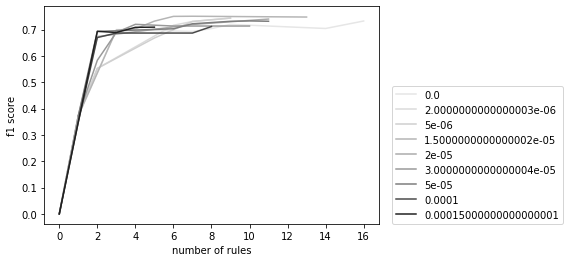

In [24]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import math
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
# name = "Greys"
# cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
# colors = cmap  # type: list

# # plt.set_prop_cycle(color=colors)

# color_map = get_cmap('viridis')
color_map = get_cmap('binary')
# color_map = get_cmap('winter')
# beta_candidates = [0,0.2,0.5,1.5,2,3,5,10]
beta_candidates = [0,0.2,0.5,1.5,2,3,5,10,15]
# beta_candidates = [0,0.2,0.5,2,3]


beta_candidates = [i * 0.00001 for i in beta_candidates]


for count,b in enumerate(beta_candidates):
#     if count in [3]: 
#         continue
    plot_use_x = []
    plot_use_y = []
    for i in range(len(lambda_candidates)):
        lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = results[b][i]
        plot_use_x.append(num)
#         plot_use_y.append(f1_score)
        plot_use_y.append(f1_score)
        
    # for x,y in zip(plot_use_x,plot_use_y):
    #     print(x,y)
    tmp = [(x,y) for x,y in zip(plot_use_x,plot_use_y) ]
#     tmp.append((0,0.5))
#     tmp.append((100,1))
    tmp = sorted(tmp,key=lambda x:x[0])
    X =np.asarray([ t[0] for t in tmp]) .reshape(-1, 1)
    y =np.asarray([ t[1] for t in tmp]) .reshape(-1, 1)
#     clf = GaussianProcessRegressor()
#     clf.fit(X, y) 
#     x_virtul = [ 0.1 * i for i in range(50)]
#     x_for_predict = np.asarray(x_virtul) .reshape(-1, 1)
#     plt.plot(x_virtul,clf.predict(x_for_predict).reshape(-1),color=color_map(  math.sqrt(b*1000)  )  )
#     plt.plot(X,y  )
    plt.plot(X,y,color=color_map(  math.sqrt(b*5000+0.01) )  )

#     format(12.456789, '.3e')
plt.legend([str(b)for b in beta_candidates],loc=(1.04,0))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend([str(b) for b in beta_candidates], loc=5)
# plt.xlim([3,10])
# plt.ylim([0.8,1])
plt.ylabel('f1 score')
plt.xlabel('number of rules')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import math
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
# name = "Greys"
# cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
# colors = cmap  # type: list

# # plt.set_prop_cycle(color=colors)

# color_map = get_cmap('viridis')
color_map = get_cmap('binary')



# lambda_candidates = [  0,0.0000001,0.000001,0.00001,0.00003,0.00005,0.00008,0.0001,0.0005,0.001,0.0013,0.0015,0.0018,0.002,0.0025,0.003,0.005,0.006,0.007,0.008,0.01,0.015,0.02,0.03,0.05,0.1,0.15,0.2,0.5 ]


# beta_candidates = [0,0.2,0.5,1,1.5,2,3,5,10]
# beta_candidates = [i * 0.00001 for i in beta_candidates]

for b in beta_candidates:
    plot_use_x = []
    plot_use_y = []
    for i in range(len(lambda_candidates)):
        lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = results[b][i]
        plot_use_x.append(lambda_parameter)
        plot_use_y.append(f1_score)
    # for x,y in zip(plot_use_x,plot_use_y):
    #     print(x,y)
   
    plt.plot(plot_use_x,plot_use_y,color=color_map(  math.sqrt(b*5000)  ))
plt.legend([str(b) for b in beta_candidates], loc=(1.04,0))

plt.ylabel('f1 score')
plt.xlabel('lambda')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

color_map = get_cmap('binary')
for b in beta_candidates:
    plot_use_x = []
    plot_use_y = []
    for i in range(len(lambda_candidates)):
        lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = results[b][i]
        plot_use_x.append(lambda_parameter)
        plot_use_y.append(num)
    # for x,y in zip(plot_use_x,plot_use_y):
    #     print(x,y)
    plt.plot(plot_use_x,plot_use_y,color=color_map(  math.sqrt(b*1000)  ))
plt.legend([str(b) for b in beta_candidates], loc=(1.04,0))

plt.ylabel('num of rules')
plt.xlabel('lambda')
plt.xlim([0,0.01])
plt.show()

In [ ]:
score_list=[]
for i,l in enumerate(lambda_candidates):
    for b in beta_candidates:

        lambda_parameter,(num,f1_score,acc_score,rec_score,pre_score,num_of_instance,explanations) = results[b][i]
        score_list.append(  (l,b,num,f1_score,acc_score,rec_score,pre_score) )

score_list = sorted(score_list,reverse=True,key=lambda x:x[4])
print(score_list[0])
l,b,num,f1_score,acc_score,rec_score,pre_score = score_list[0]
print("the best lambda: ",l)
print("the best beta:",b)
print("f1:",f1_score," acc: ",acc_score," recall: ",rec_score," precision: ",pre_score)

In [ ]:
for b in results:
    print(b)

In [ ]:
from pprint import pprint as pr
pr(results)